In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set_palette('Set2')


## Data Loading and Initial Exploration

In [3]:
# Go one folder back and then access the data folder
base_path = os.path.join(os.path.dirname(os.getcwd()), "data")
reviews_path = os.path.join(base_path, "yelp_training_set/yelp_training_set_review.json")
business_path = os.path.join(base_path, "yelp_training_set/yelp_training_set_business.json")
user_path = os.path.join(base_path, "yelp_training_set/yelp_training_set_user.json")

# Function to load JSON data
def load_json_data(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Load datasets
reviews_df = load_json_data(reviews_path)
business_df = load_json_data(business_path)
users_df = load_json_data(user_path)

print(f"Reviews dataset shape: {reviews_df.shape}")
print(f"Business dataset shape: {business_df.shape}")
print(f"Users dataset shape: {users_df.shape}")


Reviews dataset shape: (229907, 8)
Business dataset shape: (11537, 13)
Users dataset shape: (43873, 6)


## Reviews Dataset Analysis

In [4]:
# Display review dataset structure
print("Reviews dataset columns:")
print(reviews_df.columns.tolist())
reviews_df.head()


Reviews dataset columns:
['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type', 'business_id']


,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [5]:
# Basic statistics for reviews
print("Reviews dataset basic statistics:")
reviews_df.describe(include='all')


Reviews dataset basic statistics:


,votes,user_id,review_id,stars,date,text,type,business_id
count,229907,229907,229907,229907.000000,229907,229907,229907,229907
unique,2518,45981,229907,NaN,2504,229660,1,11537
top,"{'funny': 0, 'useful': 0, 'cool': 0}",fczQCSmaWF78toLEmb0Zsw,QM1rFJsW-ZJoCHbgsysKaw,NaN,2013-01-03,closed,review,hW0Ne_HTHEAgGF1rAdmR-g
freq,82823,588,1,NaN,371,13,229907,844
mean,NaN,NaN,NaN,3.766723,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.217010,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


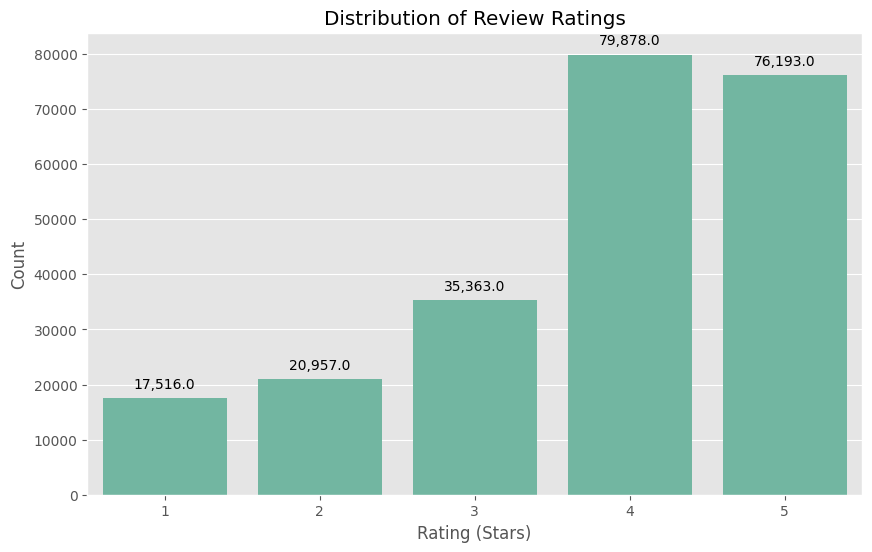

In [6]:
# Convert date to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Distribution of review ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='stars', data=reviews_df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), textcoords = 'offset points')

plt.show()


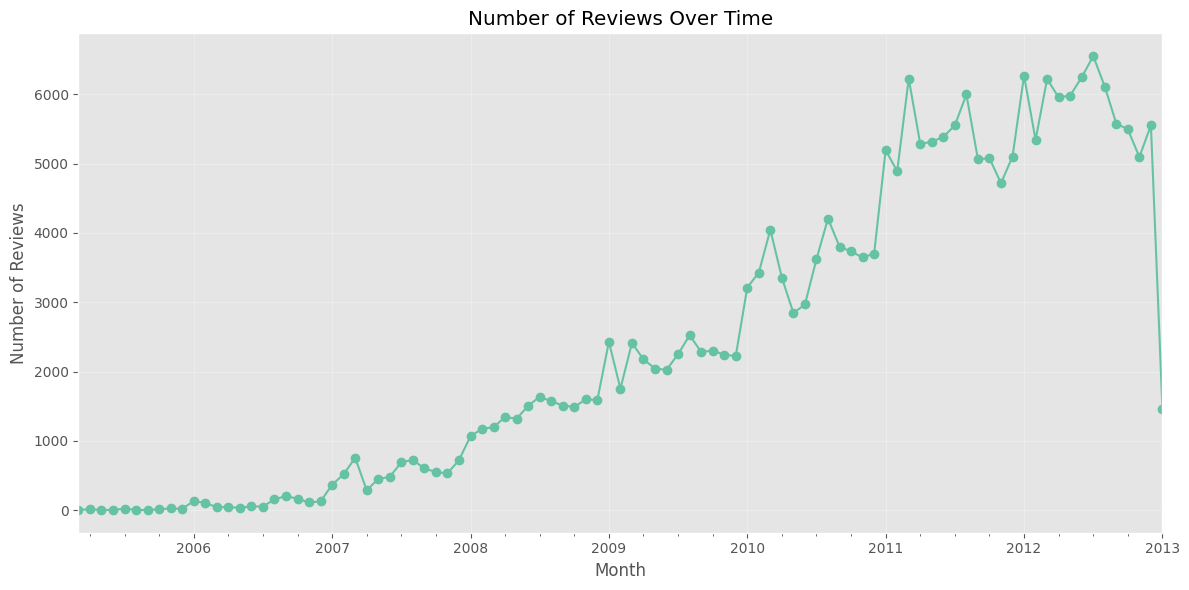

In [7]:
# Reviews over time
reviews_per_month = reviews_df.groupby(reviews_df['date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


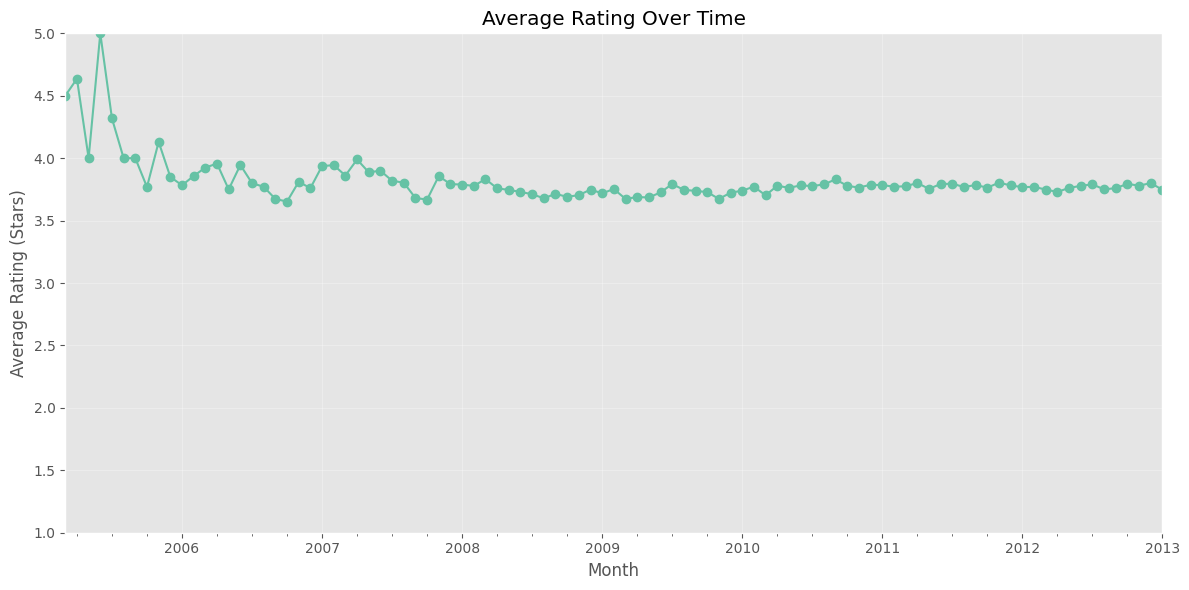

In [8]:
# Average rating over time
avg_rating_per_month = reviews_df.groupby(reviews_df['date'].dt.to_period('M'))['stars'].mean()

plt.figure(figsize=(12, 6))
avg_rating_per_month.plot(kind='line', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating (Stars)')
plt.ylim(1, 5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


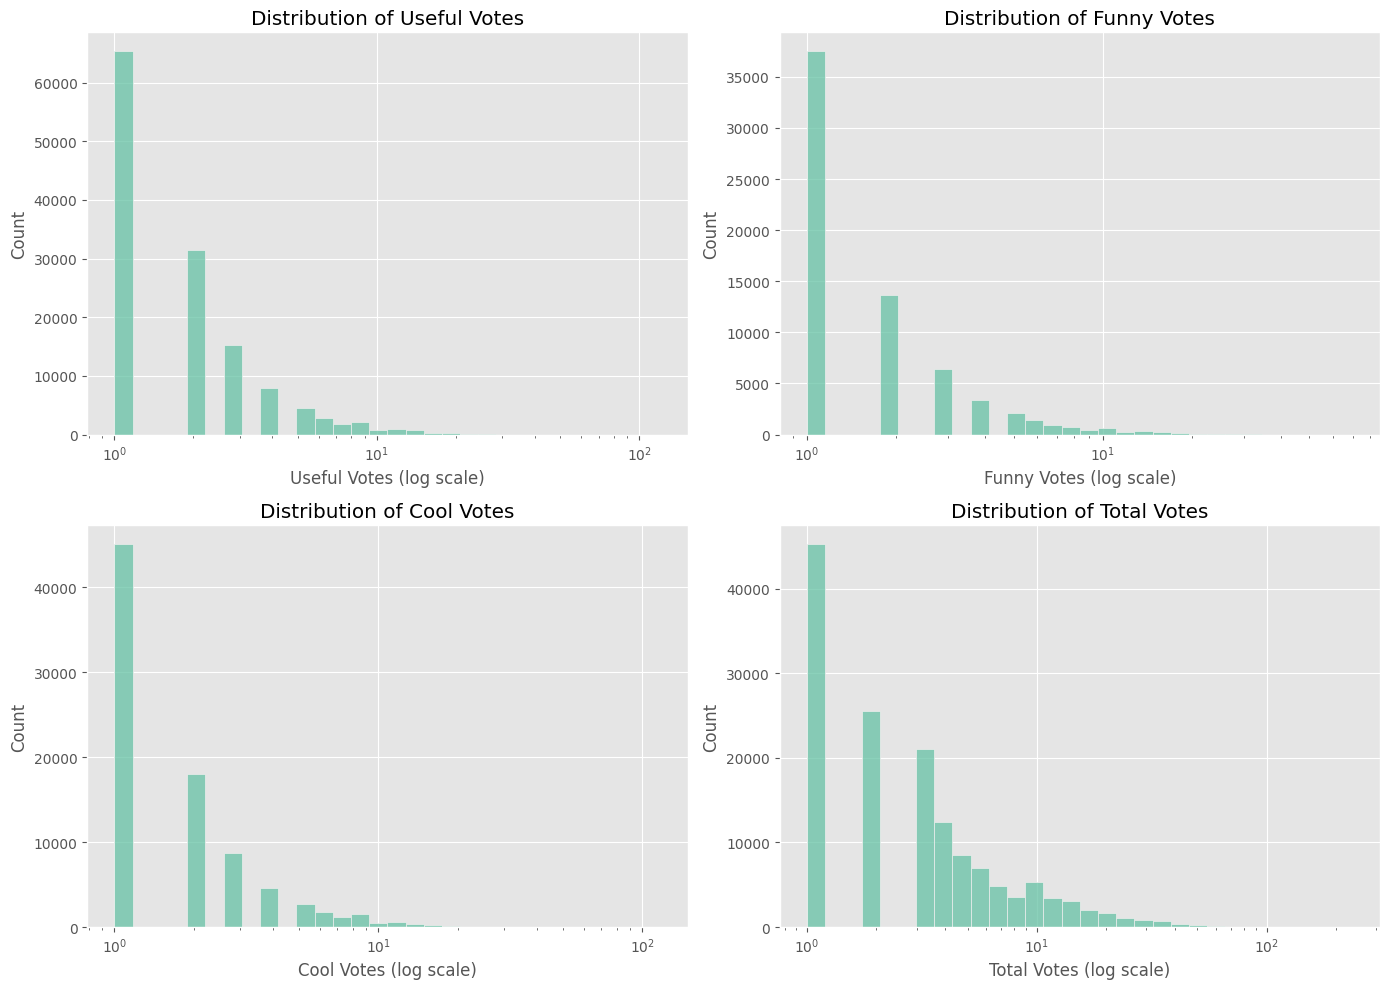

In [9]:
# Extract votes data
reviews_df['useful_votes'] = reviews_df['votes'].apply(lambda x: x['useful'])
reviews_df['funny_votes'] = reviews_df['votes'].apply(lambda x: x['funny'])
reviews_df['cool_votes'] = reviews_df['votes'].apply(lambda x: x['cool'])
reviews_df['total_votes'] = reviews_df['useful_votes'] + reviews_df['funny_votes'] + reviews_df['cool_votes']

# Votes distribution
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(reviews_df['useful_votes'], log_scale=True, bins=30)
plt.title('Distribution of Useful Votes')
plt.xlabel('Useful Votes (log scale)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(reviews_df['funny_votes'], log_scale=True, bins=30)
plt.title('Distribution of Funny Votes')
plt.xlabel('Funny Votes (log scale)')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(reviews_df['cool_votes'], log_scale=True, bins=30)
plt.title('Distribution of Cool Votes')
plt.xlabel('Cool Votes (log scale)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(reviews_df['total_votes'], log_scale=True, bins=30)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes (log scale)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Outlier Detection in Reviews**

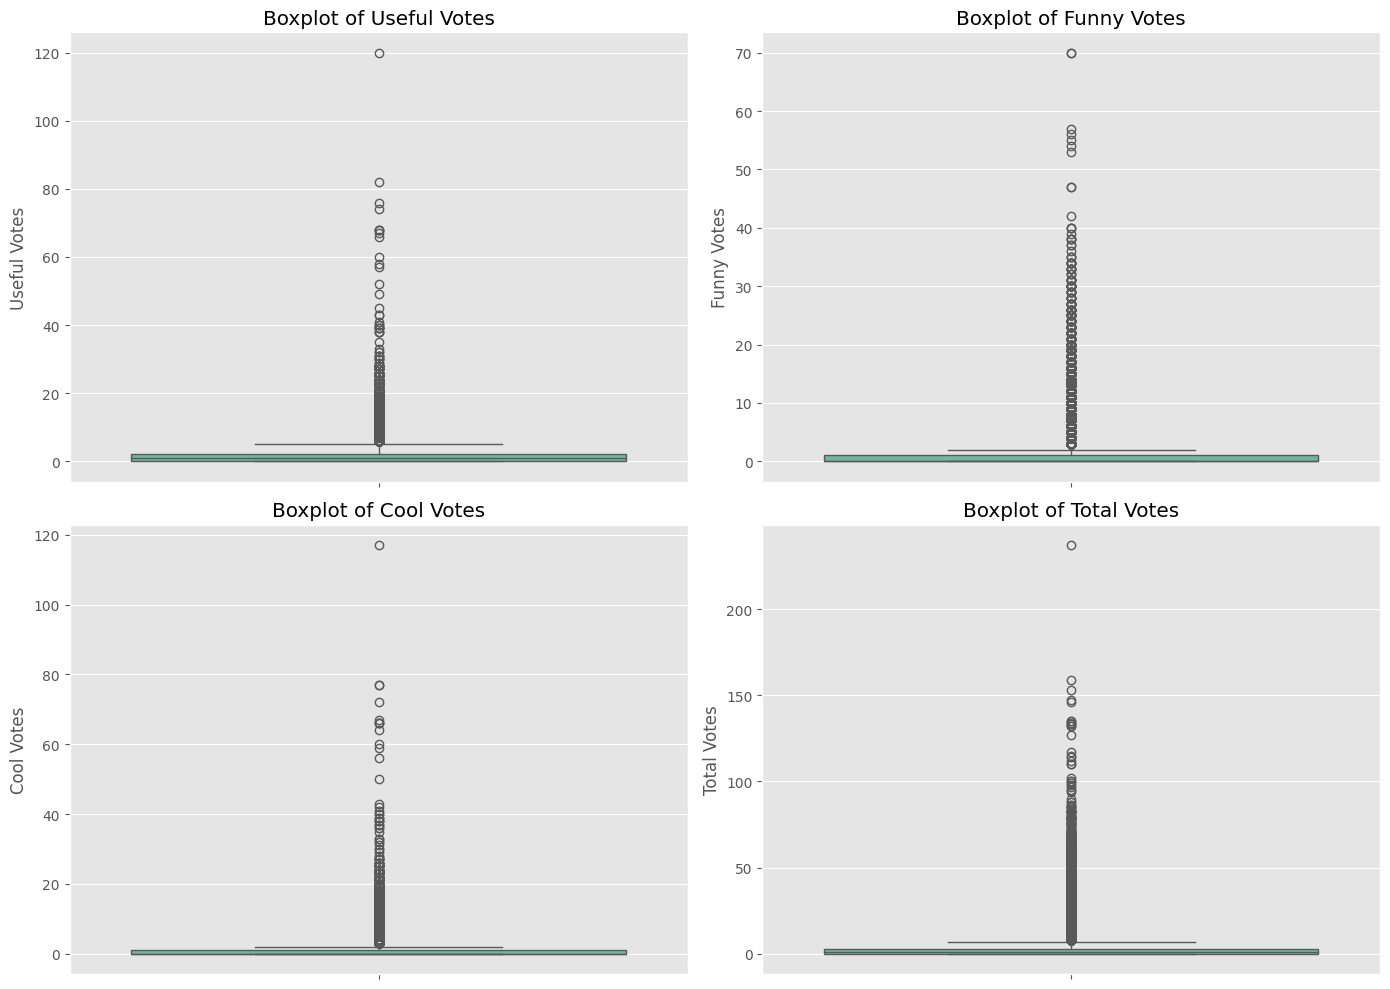

In [10]:
# Boxplot for votes to identify outliers
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=reviews_df['useful_votes'])
plt.title('Boxplot of Useful Votes')
plt.ylabel('Useful Votes')

plt.subplot(2, 2, 2)
sns.boxplot(y=reviews_df['funny_votes'])
plt.title('Boxplot of Funny Votes')
plt.ylabel('Funny Votes')

plt.subplot(2, 2, 3)
sns.boxplot(y=reviews_df['cool_votes'])
plt.title('Boxplot of Cool Votes')
plt.ylabel('Cool Votes')

plt.subplot(2, 2, 4)
sns.boxplot(y=reviews_df['total_votes'])
plt.title('Boxplot of Total Votes')
plt.ylabel('Total Votes')

plt.tight_layout()
plt.show()


In [11]:
# Calculate IQR for outlier detection
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Get outliers for total votes
vote_outliers, lower_bound, upper_bound = get_outliers(reviews_df, 'total_votes')
print(f"Total votes outliers: {len(vote_outliers)} ({len(vote_outliers)/len(reviews_df)*100:.2f}%)")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Max total votes: {reviews_df['total_votes'].max()}")

# Display top 10 reviews by votes
print("Top 10 reviews by total votes:")
top_voted = reviews_df.sort_values('total_votes', ascending=False).head(10)
top_voted[['stars', 'useful_votes', 'funny_votes', 'cool_votes', 'total_votes']]


Total votes outliers: 22625 (9.84%)
Lower bound: -4.5, Upper bound: 7.5
Max total votes: 237
Top 10 reviews by total votes:


,stars,useful_votes,funny_votes,cool_votes,total_votes
42391,5,120,0,117,237
94773,5,82,0,77,159
4957,5,76,0,77,153
165277,5,49,56,42,147
132069,5,74,0,72,146
174826,1,29,70,36,135
86365,5,68,0,67,135
30624,4,68,0,66,134
9634,4,38,57,38,133
212372,4,67,0,66,133


## Business Dataset Analysis

In [12]:
# Display business dataset structure
print("Business dataset columns:")
print(business_df.columns.tolist())
business_df.head()


Business dataset columns:
['business_id', 'full_address', 'open', 'categories', 'city', 'review_count', 'name', 'neighborhoods', 'longitude', 'state', 'stars', 'latitude', 'type']


,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"[Accountants, Professional Services, Tax Servi...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"[Sporting Goods, Bikes, Shopping]",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"[Food, Grocery]",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business


In [13]:
# Basic statistics for businesses
print("Business dataset basic statistics:")
business_df.describe(include='all')


Business dataset basic statistics:


,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
count,11537,11537,11537,11537,11537,11537.000000,11537,11537,11537.000000,11537,11537.000000,11537.000000,11537
unique,11537,10337,2,2061,61,NaN,8315,1,NaN,4,NaN,NaN,1
top,6yVe_iet5qD7SzVMhRYYog,"7014 E Camelback Rd\nScottsdale, AZ 85251",True,"[Mexican, Restaurants]",Phoenix,NaN,Subway,[],NaN,AZ,NaN,NaN,business
freq,1,38,10313,528,4154,NaN,68,11537,NaN,11534,NaN,NaN,11537
mean,NaN,NaN,NaN,NaN,NaN,20.192858,NaN,NaN,-111.988898,NaN,3.674525,33.487833,NaN
std,NaN,NaN,NaN,NaN,NaN,43.345024,NaN,NaN,0.164932,NaN,0.862407,0.133937,NaN
min,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,-112.875482,NaN,1.000000,32.876848,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,-112.074012,NaN,3.000000,33.394031,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,-111.968191,NaN,3.500000,33.489668,NaN
75%,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,-111.898952,NaN,4.500000,33.584409,NaN


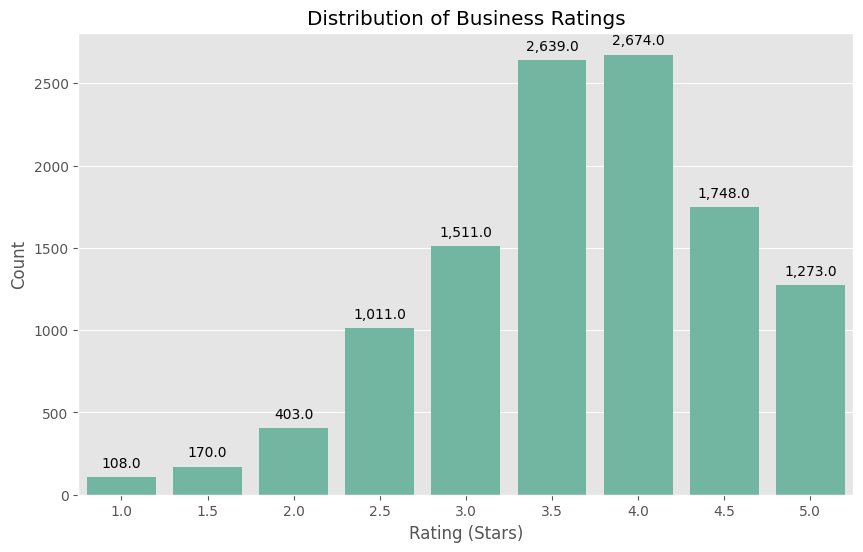

In [14]:
# Distribution of business ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='stars', data=business_df)
plt.title('Distribution of Business Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), textcoords = 'offset points')

plt.show()


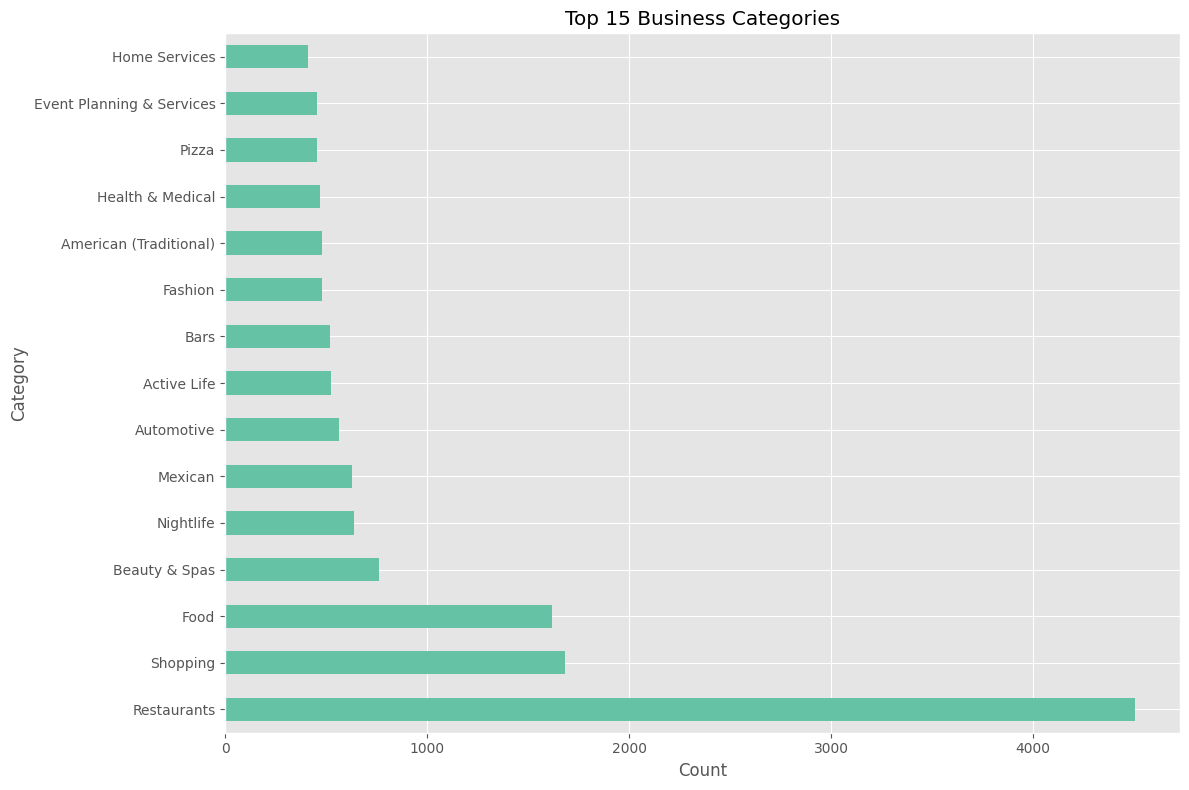

In [16]:
# Top business categories
# Extract and count categories
all_categories = []
for categories in business_df['categories'].dropna():
    if categories:
        all_categories.extend([c.strip() for c in categories])

category_counts = pd.Series(all_categories).value_counts()

plt.figure(figsize=(12, 8))
category_counts[:15].plot(kind='barh')
plt.title('Top 15 Business Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


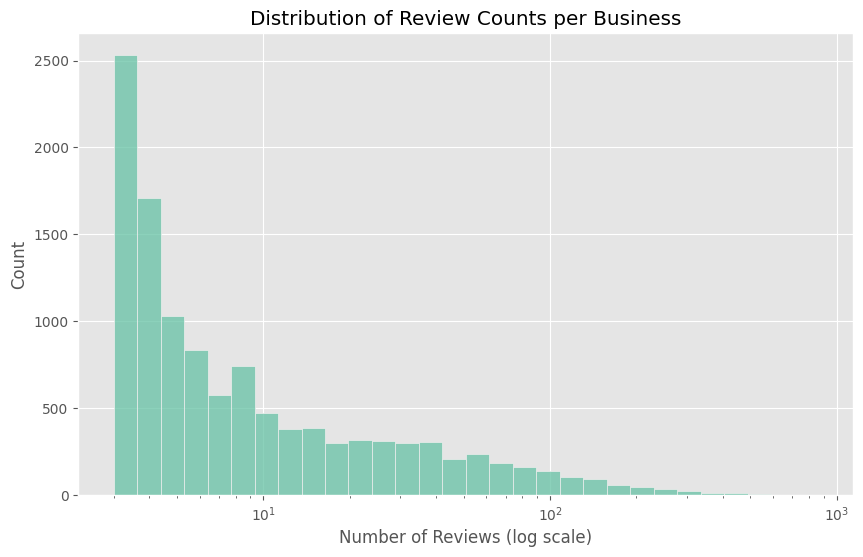

In [17]:
# Business review count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=business_df, x='review_count', bins=30, log_scale=True)
plt.title('Distribution of Review Counts per Business')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Count')
plt.show()


**Outlier Detection in Business Data**

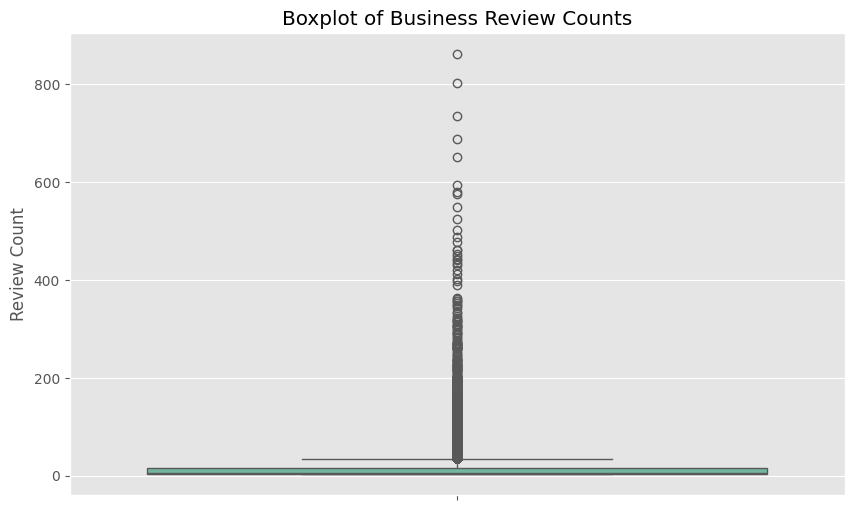

In [18]:
# Boxplot for business review counts to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=business_df['review_count'])
plt.title('Boxplot of Business Review Counts')
plt.ylabel('Review Count')
plt.show()


In [19]:
# Get outliers for business review counts
review_count_outliers, lower_bound, upper_bound = get_outliers(business_df, 'review_count')
print(f"Business review count outliers: {len(review_count_outliers)} ({len(review_count_outliers)/len(business_df)*100:.2f}%)")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Max review count: {business_df['review_count'].max()}")

# Display top 10 businesses by review count
print("Top 10 businesses by review count:")
top_reviewed = business_df.sort_values('review_count', ascending=False).head(10)
top_reviewed[['name', 'city', 'stars', 'review_count']]


Business review count outliers: 1638 (14.20%)
Lower bound: -14.0, Upper bound: 34.0
Max review count: 862
Top 10 businesses by review count:


,name,city,stars,review_count
9533,Phoenix Sky Harbor International Airport,Phoenix,3.0,862
5498,Pizzeria Bianco,Phoenix,4.0,803
3428,Four Peaks Brewing Co,Tempe,4.5,735
6422,Matt's Big Breakfast,Phoenix,4.0,689
8283,FEZ,Phoenix,4.0,652
7053,Cibo,Phoenix,4.5,594
62,Cornish Pasty Company,Tempe,4.5,580
3265,Postino Arcadia,Phoenix,4.5,575
107,Gallo Blanco Cafe,Phoenix,4.0,549
8904,Joe's Farm Grill,Gilbert,4.0,525


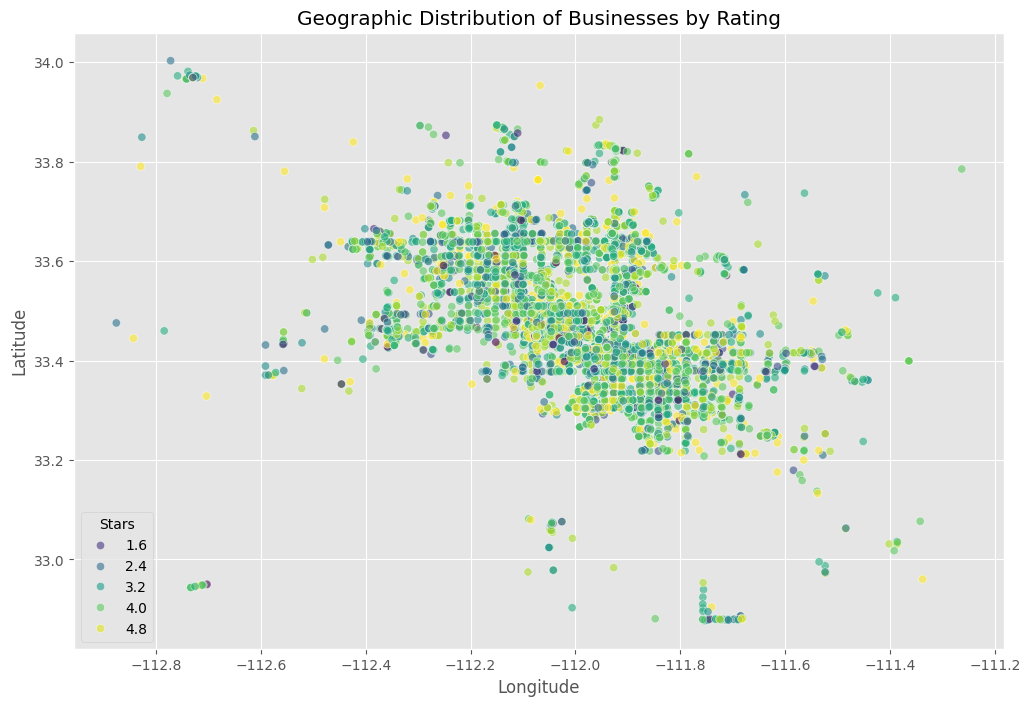

In [20]:
# Geographic distribution of businesses
plt.figure(figsize=(12, 8))
sns.scatterplot(data=business_df, x='longitude', y='latitude', hue='stars', palette='viridis', alpha=0.6)
plt.title('Geographic Distribution of Businesses by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Stars')
plt.show()


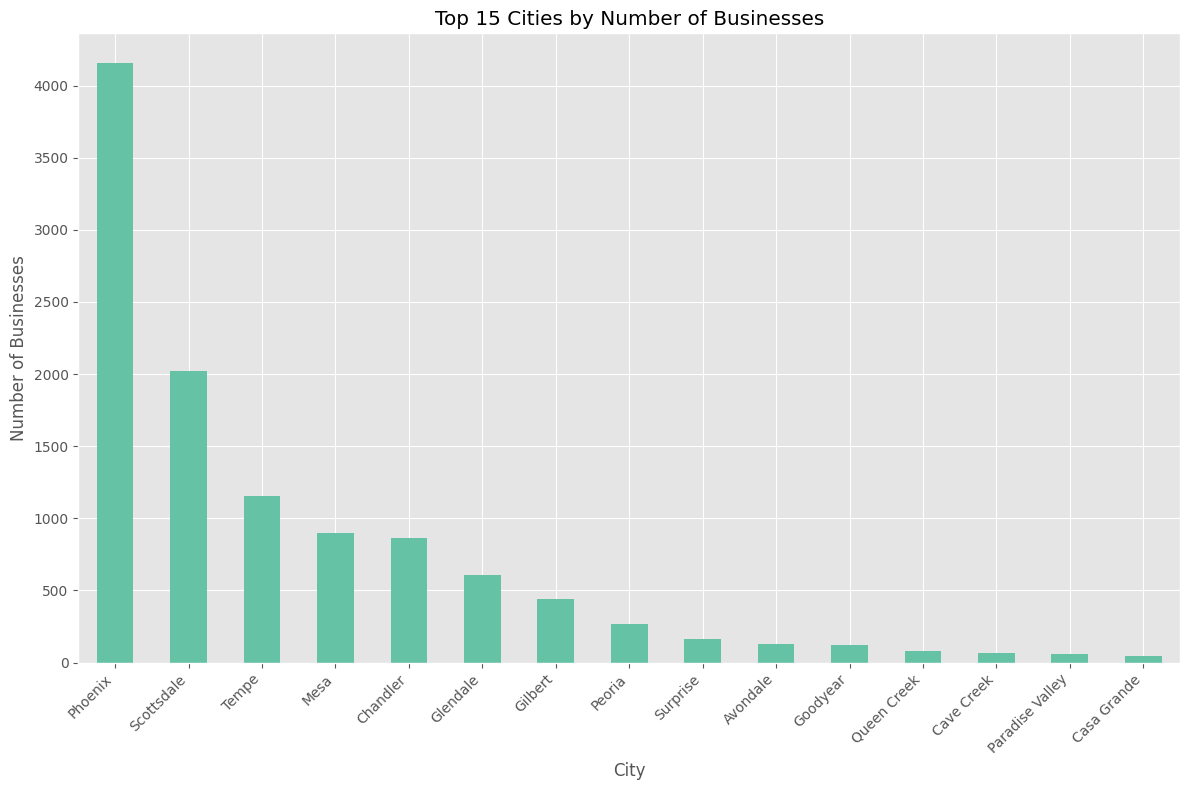

In [21]:
# Top cities by number of businesses
city_counts = business_df['city'].value_counts().head(15)
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar')
plt.title('Top 15 Cities by Number of Businesses')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## User Dataset Analysis

In [22]:
# Display user dataset structure
print("User dataset columns:")
print(users_df.columns.tolist())
users_df.head()


User dataset columns:
['votes', 'user_id', 'name', 'average_stars', 'review_count', 'type']


,votes,user_id,name,average_stars,review_count,type
0,"{'funny': 0, 'useful': 7, 'cool': 0}",CR2y7yEm4X035ZMzrTtN9Q,Jim,5.0,6,user
1,"{'funny': 0, 'useful': 1, 'cool': 0}",_9GXoHhdxc30ujPaQwh6Ew,Kelle,1.0,2,user
2,"{'funny': 0, 'useful': 1, 'cool': 0}",8mM-nqxjg6pT04kwcjMbsw,Stephanie,5.0,2,user
3,"{'funny': 0, 'useful': 2, 'cool': 0}",Ch6CdTR2IVaVANr-RglMOg,T,5.0,2,user
4,"{'funny': 0, 'useful': 0, 'cool': 0}",NZrLmHRyiHmyT1JrfzkCOA,Beth,1.0,1,user


In [23]:
# Basic statistics for users
print("User dataset basic statistics:")
users_df.describe(include='all')


User dataset basic statistics:


,votes,user_id,name,average_stars,review_count,type
count,43873,43873,43873,43873.000000,43873.000000,43873
unique,12770,43873,8323,NaN,NaN,1
top,"{'funny': 0, 'useful': 0, 'cool': 0}",aTofoitZDS2l_DoYrmQomA,David,NaN,NaN,user
freq,5159,1,465,NaN,NaN,43873
mean,NaN,NaN,NaN,3.744078,38.858729,NaN
std,NaN,NaN,NaN,0.965280,117.907082,NaN
min,NaN,NaN,NaN,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.330000,2.000000,NaN
50%,NaN,NaN,NaN,3.860000,7.000000,NaN
75%,NaN,NaN,NaN,4.360000,23.000000,NaN


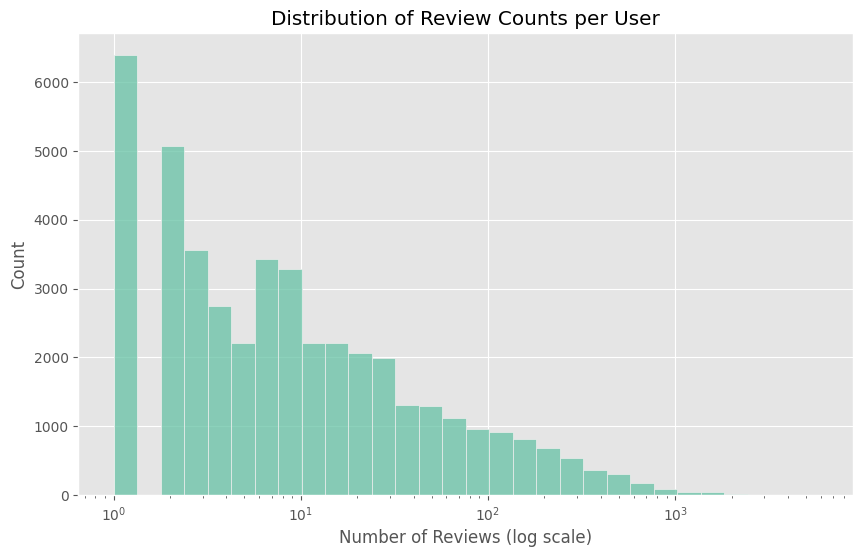

In [24]:
# Distribution of user review counts
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='review_count', bins=30, log_scale=True)
plt.title('Distribution of Review Counts per User')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Count')
plt.show()


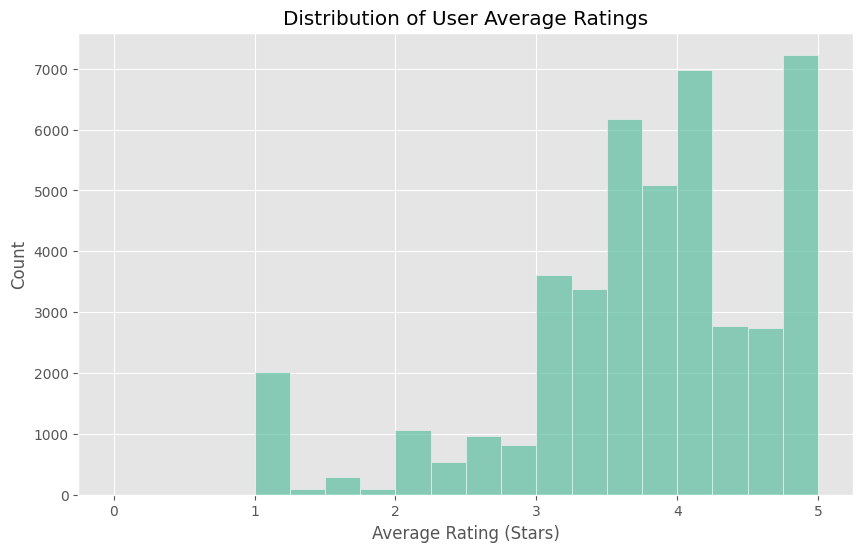

In [25]:
# Distribution of user average stars
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='average_stars', bins=20)
plt.title('Distribution of User Average Ratings')
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Count')
plt.show()


**Outlier Detection in User Data**

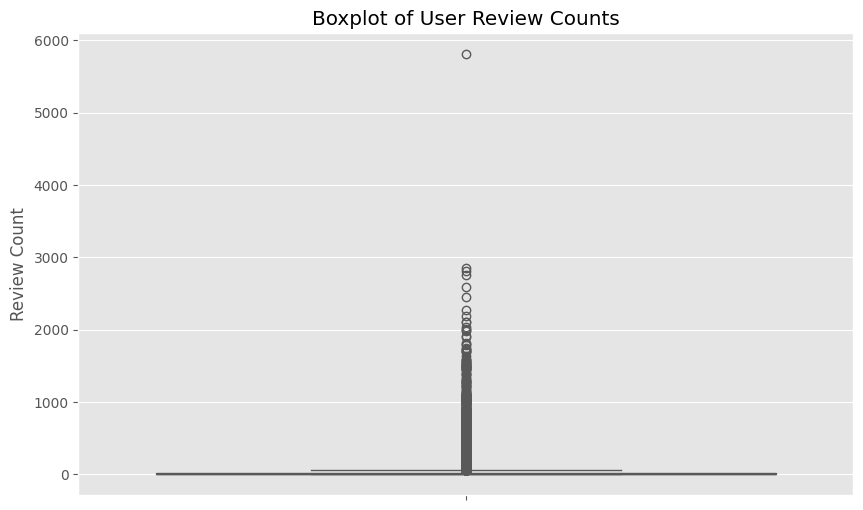

In [26]:

# Boxplot for user review counts to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=users_df['review_count'])
plt.title('Boxplot of User Review Counts')
plt.ylabel('Review Count')
plt.show()


In [27]:
# Get outliers for user review counts
user_review_outliers, lower_bound, upper_bound = get_outliers(users_df, 'review_count')
print(f"User review count outliers: {len(user_review_outliers)} ({len(user_review_outliers)/len(users_df)*100:.2f}%)")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Max user review count: {users_df['review_count'].max()}")

# Display top 10 users by review count
print("Top 10 users by review count:")
top_reviewers = users_df.sort_values('review_count', ascending=False).head(10)
top_reviewers[['name', 'review_count', 'average_stars']]


User review count outliers: 6309 (14.38%)
Lower bound: -29.5, Upper bound: 54.5
Max user review count: 5807
Top 10 users by review count:


,name,review_count,average_stars
1833,Kim,5807,3.77
5087,Karen,2848,3.63
7421,Andrew,2810,3.64
17275,Shiho,2760,3.84
8083,Stephy,2587,3.87
20315,Bruce,2448,3.41
27960,Jando,2274,3.28
20762,Hen,2191,3.35
25116,Gourmet,2109,3.97
24896,Andrea,2100,3.86


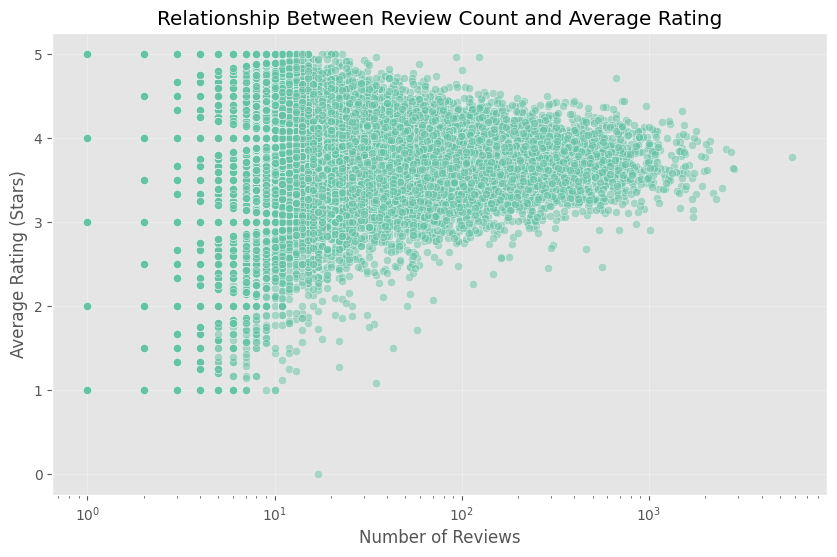

In [28]:
# Relationship between user review count and average stars
plt.figure(figsize=(10, 6))
sns.scatterplot(data=users_df, x='review_count', y='average_stars', alpha=0.5)
plt.title('Relationship Between Review Count and Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating (Stars)')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.show()


## Cross-Dataset Analysis


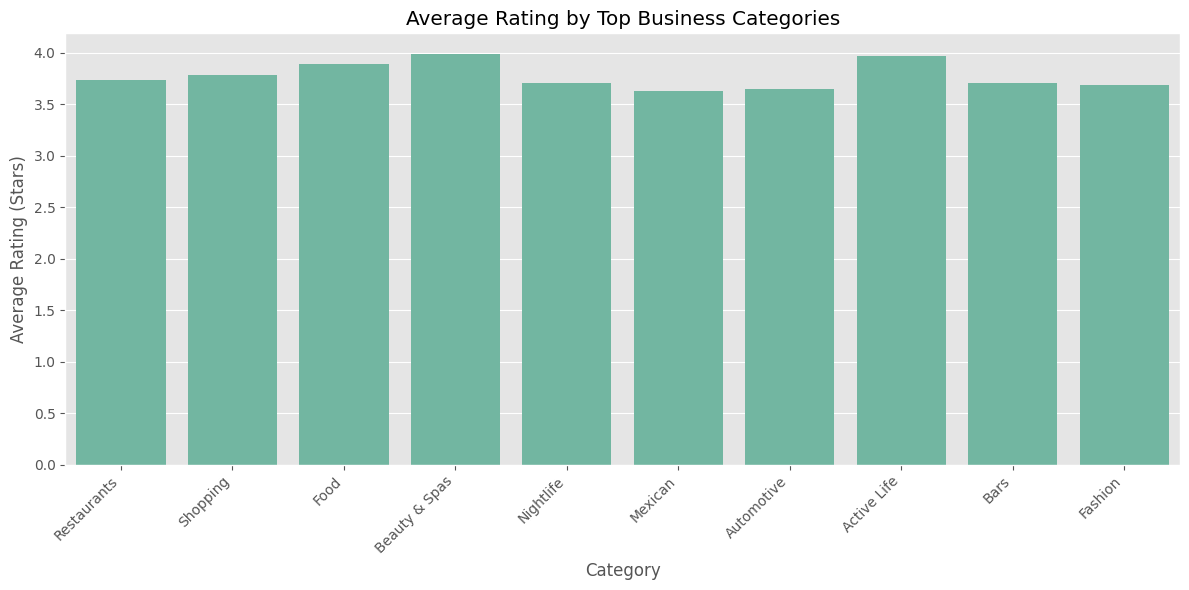

In [31]:
# Ensure 'categories' column in business_df is a string for filtering
business_df['categories'] = business_df['categories'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Merge reviews with business data
merged_df = reviews_df.merge(business_df[['business_id', 'categories', 'city']], on='business_id')

# Analyze ratings by top categories
top_categories = category_counts[:10].index.tolist()

category_ratings = []
for category in top_categories:
    category_reviews = merged_df[merged_df['categories'].str.contains(category, na=False)]
    avg_rating = category_reviews['stars'].mean()
    category_ratings.append({'Category': category, 'Average Rating': avg_rating, 'Review Count': len(category_reviews)})

category_ratings_df = pd.DataFrame(category_ratings)

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Average Rating', data=category_ratings_df)
plt.title('Average Rating by Top Business Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating (Stars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


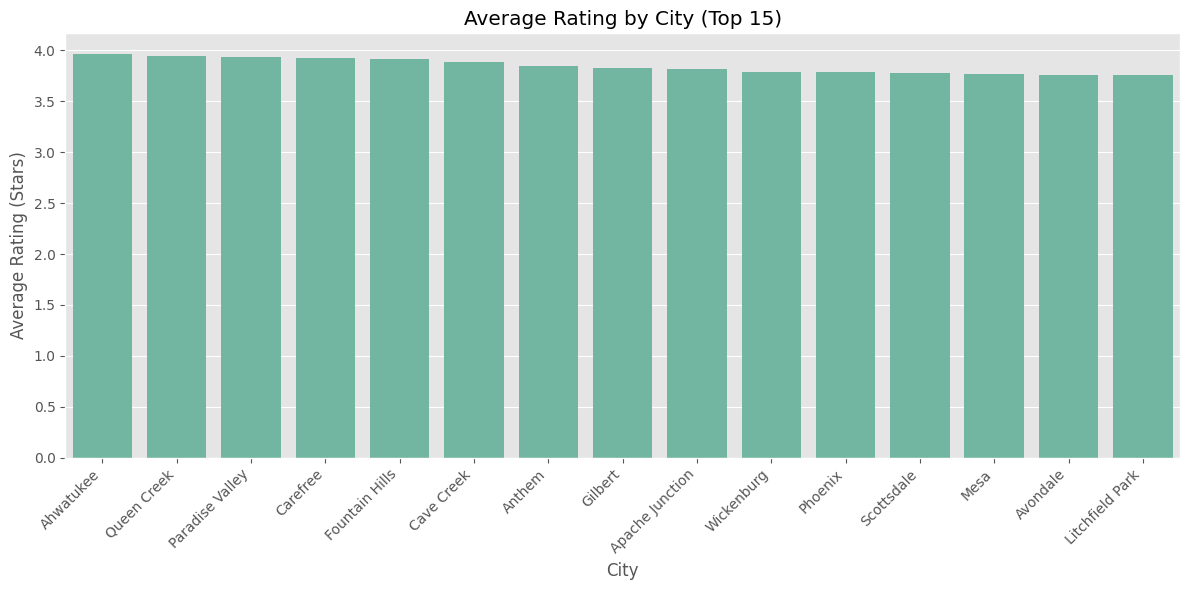

In [33]:
# Ratings by city
city_ratings = merged_df.groupby('city')['stars'].agg(['mean', 'count']).reset_index()
city_ratings.columns = ['City', 'Average Rating', 'Review Count']
city_ratings = city_ratings[city_ratings['Review Count'] > 100].sort_values('Average Rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Average Rating', data=city_ratings.head(15))
plt.title('Average Rating by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Average Rating (Stars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Correlation Analysis


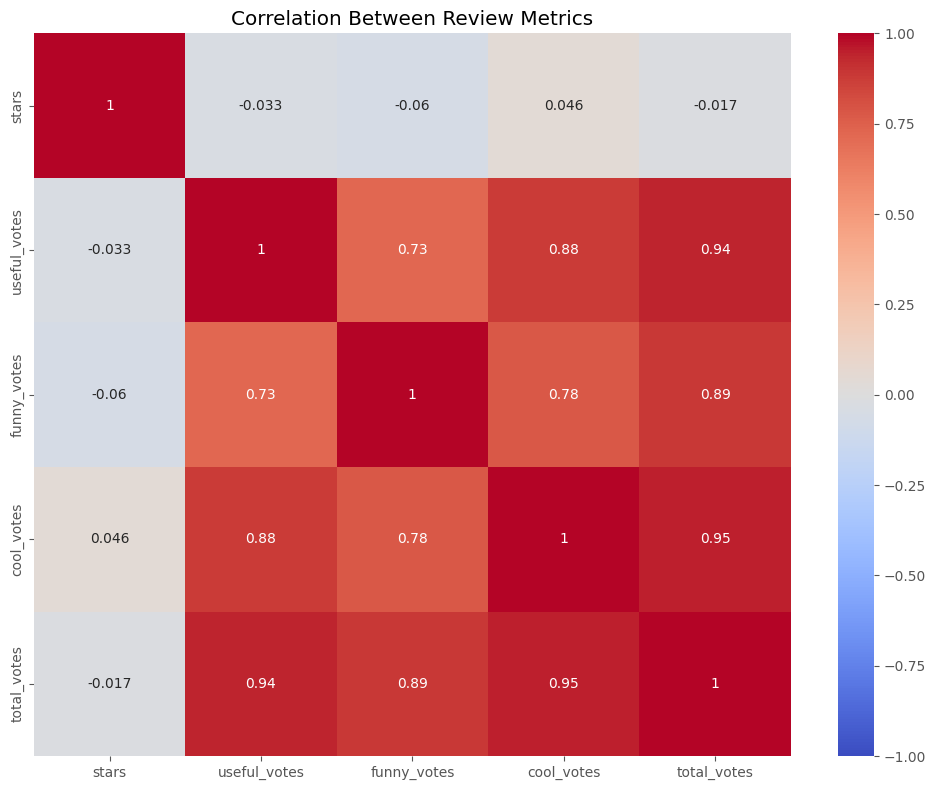

In [34]:
# Correlation between review metrics
correlation_df = reviews_df[['stars', 'useful_votes', 'funny_votes', 'cool_votes', 'total_votes']]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Review Metrics')
plt.tight_layout()
plt.show()


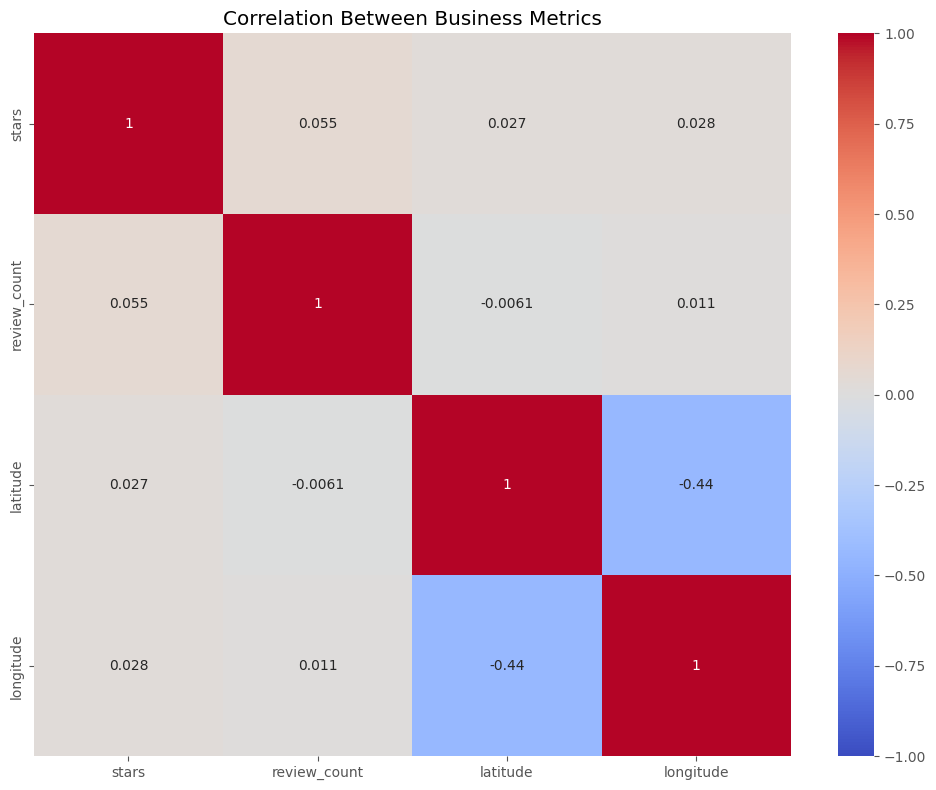

In [35]:
# Correlation between business metrics
business_corr_df = business_df[['stars', 'review_count', 'latitude', 'longitude']]
business_corr_matrix = business_corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(business_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Business Metrics')
plt.tight_layout()
plt.show()


## Text Analysis Preview


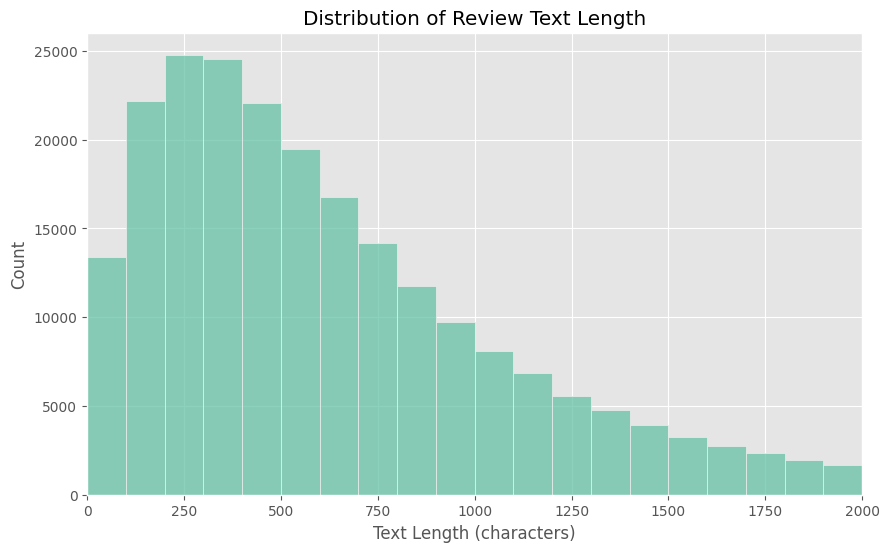

In [36]:
# Basic text analysis of reviews
reviews_df['text_length'] = reviews_df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=reviews_df, x='text_length', bins=50)
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.xlim(0, 2000)
plt.show()


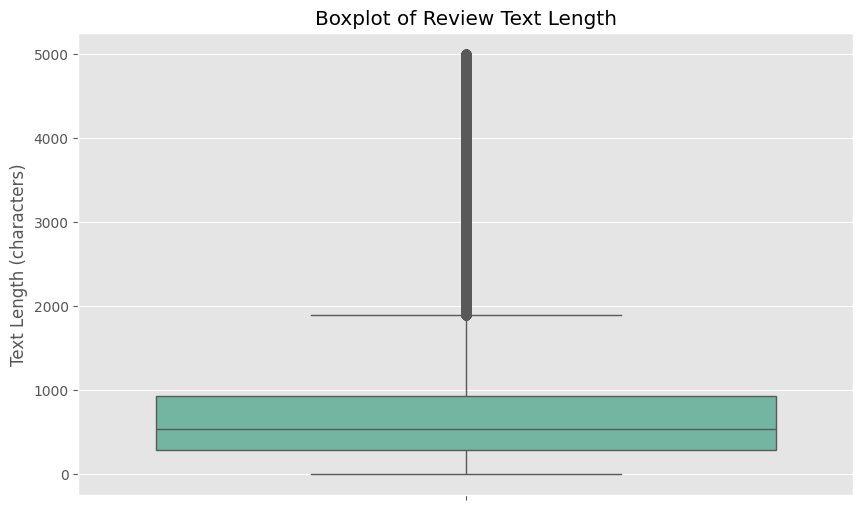

In [37]:
# Boxplot for text length to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=reviews_df['text_length'])
plt.title('Boxplot of Review Text Length')
plt.ylabel('Text Length (characters)')
plt.show()


In [38]:
# Get outliers for text length
text_length_outliers, lower_bound, upper_bound = get_outliers(reviews_df, 'text_length')
print(f"Text length outliers: {len(text_length_outliers)} ({len(text_length_outliers)/len(reviews_df)*100:.2f}%)")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Max text length: {reviews_df['text_length'].max()}")


Text length outliers: 11522 (5.01%)
Lower bound: -676.5, Upper bound: 1895.5
Max text length: 5000


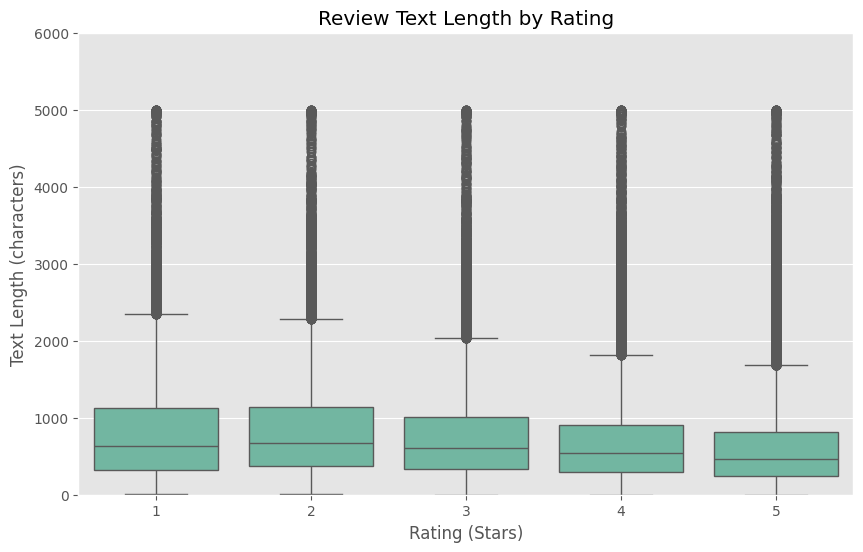

In [43]:
# Correlation between text length and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='text_length', data=reviews_df)
plt.title('Review Text Length by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Text Length (characters)')
plt.ylim(0, 6000)
plt.show()


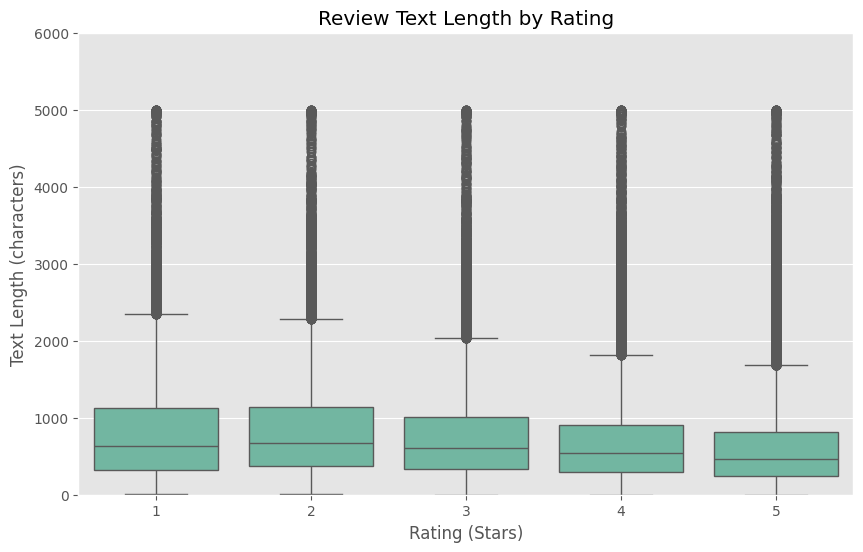

In [42]:
# Correlation between text length and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='text_length', data=reviews_df)
plt.title('Review Text Length by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Text Length (characters)')
plt.ylim(0, 6000)
plt.show()


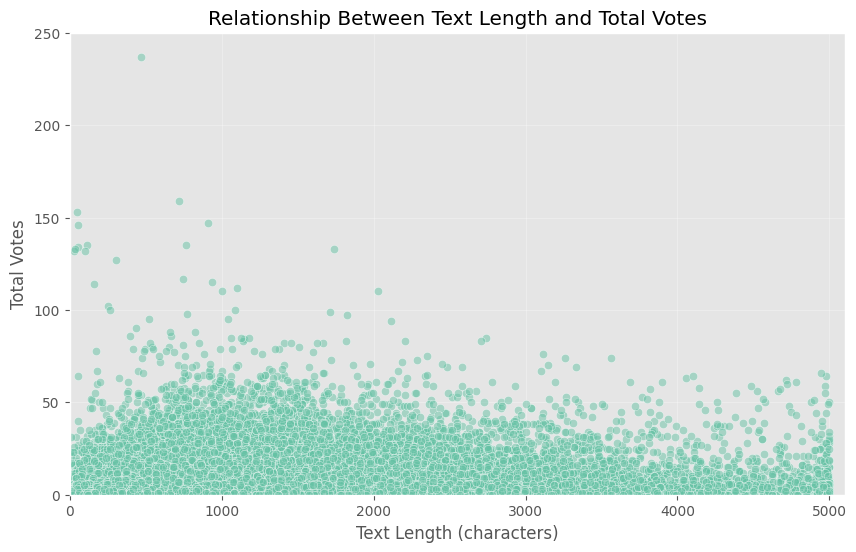

In [49]:
# Correlation between text length and votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='total_votes', data=reviews_df, alpha=0.5)
plt.title('Relationship Between Text Length and Total Votes')
plt.xlabel('Text Length (characters)')
plt.ylabel('Total Votes')
plt.xlim(0, 5100)
plt.ylim(0, 250)
plt.grid(True, alpha=0.3)
plt.show()


## Summary Statistics

In [ ]:
# Generate summary statistics for all datasets
summary_stats = {
    'reviews': {
        'total_reviews': len(reviews_df),
        'average_stars': reviews_df['stars'].mean(),
        'star_distribution': reviews_df['stars'].value_counts(normalize=True).to_dict(),
        'average_text_length': reviews_df['text_length'].mean(),
        'average_useful_votes': reviews_df['useful_votes'].mean(),
        'average_funny_votes': reviews_df['funny_votes'].mean(),
        'average_cool_votes': reviews_df['cool_votes'].mean(),
        'average_total_votes': reviews_df['total_votes'].mean(),
        'review_count_outliers': len(review_count_outliers),
        'text_length_outliers': len(text_length_outliers),
        'vote_outliers': len(vote_outliers),
        'user_review_count_outliers': len(user_review_outliers),
        'business_review_count_outliers': len(review_count_outliers),
        'top_reviewed_businesses': top_reviewed[['name', 'stars', 'review_count']].to_dict(orient='records'),
        'top_reviewers': top_reviewers[['name', 'review_count', 'average_stars']].to_dict(orient='records')
    },
    'businesses': {
        'total_businesses': len(business_df),
        'average_stars': business_df['stars'].mean(),
        'star_distribution': business_df['stars'].value_counts(normalize=True).to_dict(),
        'average_review_count': business_df['review_count'].mean(),
        'category_distribution': category_counts[:10].to_dict(),
        'city_distribution': city_counts[:10].to_dict()
    },
    'users': {
        'total_users': len(users_df),
        'average_stars': users_df['average_stars'].mean(),
        'average_review_count': users_df['review_count'].mean(),
        'user_review_count_outliers': len(user_review_outliers)
    }
}
# Save summary statistics to JSON file 
summary_path = os.path.join(base_path, "summary_statistics.json")
with open(summary_path, 'w') as f:
    json.dump(summary_stats, f, indent=4)
print(f"Summary statistics saved to {summary_path}")



Summary statistics saved to c:\Users\rabia\Documents\.recommendation\data\summary_statistics.json
